In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy


In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

tuktoyaktuk ca
kirkenaer no
ushuaia ar
chokurdakh ru
grand gaube mu
jalu ly
kapaa us
illoqqortoormiut gl
belturbet ie
ushuaia ar
bosaso so
jamestown sh
grand river south east mu
punta arenas cl
fort saint james ca
ushuaia ar
pevek ru
east london za
vila franca do campo pt
hilo us
zhicheng cn
mataura pf
atuona pf
hasaki jp
ushuaia ar
qaanaaq gl
okhotsk ru
taolanaro mg
georgetown sh
albany au
punta arenas cl
punta arenas cl
new norfolk au
hof no
constitucion mx
jodhpur in
coihaique cl
punta arenas cl
port alfred za
new norfolk au
hilo us
amderma ru
ushuaia ar
lebu cl
bouna ci
gizo sb
cape town za
fengcheng cn
katsuura jp
busselton au
north bend us
dwarka in
samusu ws
tiznit ma
agadez ne
tuktoyaktuk ca
saint-francois gp
tulun ru
chabahar ir
pacific grove us
louisbourg ca
atuona pf
ereymentau kz
barentsburg sj
kamien pomorski pl
jamestown sh
victoria sc
saint-joseph re
qaanaaq gl
khatanga ru
hilo us
grants us
taolanaro mg
dalaba gn
asau tv
nguiu au
koumac nc
tuktoyaktuk ca
ostrovnoy ru
hav

cape town za
ushuaia ar
barrow us
chokurdakh ru
aksarka ru
codrington ag
ushuaia ar
mendahara id
ushuaia ar
ahipara nz
rikitea pf
bereda so
charters towers au
vaini to
chuy uy
san patricio mx
tuktoyaktuk ca
marcona pe
avarua ck
belushya guba ru
new norfolk au
vaitape pf
ushuaia ar
hobart au
punta arenas cl
anloga gh
atuona pf
temir kz
villa guerrero mx
jamestown sh
kapaa us
rikitea pf
mahebourg mu
attawapiskat ca
aljezur pt
rio claro tt
bambous virieux mu
ushuaia ar
mandalgovi mn
kieta pg
puerto ayora ec
eureka us
mackay au
khatanga ru
stornoway gb
jamestown sh
lavrentiya ru
ushuaia ar
namie jp
upernavik gl
georgetown sh
kapaa us
bredasdorp za
liwale tz
iqaluit ca
ushuaia ar
illoqqortoormiut gl
eusebio br
jamestown sh
ekhabi ru
ambilobe mg
kaitangata nz
coihaique cl
zhigansk ru
dingle ie
lebu cl
norrtalje se
flinders au
mabaruma gy
puerto ayora ec
grand river south east mu
lasa cn
marcona pe
vargashi ru
jamestown sh
khagaul in
puerto ayora ec
ushuaia ar
talnakh ru
butaritari ki
mogadis

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(15)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(15)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | tuktoyaktuk
Processing Record 2 of Set 13 | kirkenaer
Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | chokurdakh
Processing Record 5 of Set 13 | grand gaube
Processing Record 6 of Set 13 | jalu
Processing Record 7 of Set 13 | kapaa
Processing Record 8 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 13 | belturbet
Processing Record 10 of Set 13 | bosaso
Processing Record 11 of Set 13 | jamestown
Processing Record 12 of Set 13 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 13 | punta arenas
Processing Record 14 of Set 13 | fort saint james
Processing Record 15 of Set 13 | pevek
Processing Record 16 of Set 13 | east london
Processing Record 17 of Set 13 | vila franca do campo
Processing Record 18 of Set 13 | hilo
Processing Record 19 of Set 13 | zhicheng
Processing Record 20 of Set 13 | mataura
Processing Record 21 of Set 13 | atuona
Processing Record 22 of Set 13 

Processing Record 35 of Set 16 | bilibino
Processing Record 36 of Set 16 | amparafaravola
Processing Record 37 of Set 16 | beyneu
Processing Record 38 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 16 | vanavara
Processing Record 40 of Set 16 | chernoyerkovskaya
Processing Record 41 of Set 16 | kassala
Processing Record 42 of Set 16 | west fargo
Processing Record 43 of Set 16 | clyde river
Processing Record 44 of Set 16 | redlands
Processing Record 45 of Set 16 | bubaque
Processing Record 46 of Set 16 | sitka
Processing Record 47 of Set 16 | lorengau
Processing Record 48 of Set 16 | geraldton
Processing Record 49 of Set 16 | matara
Processing Record 50 of Set 16 | porto novo
Processing Record 1 of Set 17 | sisimiut
Processing Record 2 of Set 17 | chuy
Processing Record 3 of Set 17 | ilhabela
Processing Record 4 of Set 17 | moron
Processing Record 5 of Set 17 | kachikau
City not found. Skipping...
Processing Record 6 of Set 17 | shimoda
Processing Record 7 

Processing Record 21 of Set 20 | amot
Processing Record 22 of Set 20 | pitkyaranta
Processing Record 23 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 24 of Set 20 | luwingu
Processing Record 25 of Set 20 | marcona
City not found. Skipping...
Processing Record 26 of Set 20 | olafsvik
Processing Record 27 of Set 20 | dzaoudzi
Processing Record 28 of Set 20 | acapulco
Processing Record 29 of Set 20 | saskylakh
Processing Record 30 of Set 20 | algiers
Processing Record 31 of Set 20 | burnie
Processing Record 32 of Set 20 | smithers
Processing Record 33 of Set 20 | qaqortoq
Processing Record 34 of Set 20 | mount isa
Processing Record 35 of Set 20 | husavik
Processing Record 36 of Set 20 | poum
Processing Record 37 of Set 20 | bethel
Processing Record 38 of Set 20 | pangnirtung
Processing Record 39 of Set 20 | miraflores
Processing Record 40 of Set 20 | wuda
Processing Record 41 of Set 20 | gomel
Processing Record 42 of Set 20 | padang
Processing Record 43 of Set 20 | st

Processing Record 8 of Set 24 | rhyl
Processing Record 9 of Set 24 | nerchinskiy zavod
Processing Record 10 of Set 24 | selfoss
Processing Record 11 of Set 24 | bairiki
Processing Record 12 of Set 24 | penha
Processing Record 13 of Set 24 | sao gabriel da cachoeira
Processing Record 14 of Set 24 | abu jubayhah
City not found. Skipping...
Processing Record 15 of Set 24 | pital
Processing Record 16 of Set 24 | nicolas bravo
Processing Record 17 of Set 24 | huron
Processing Record 18 of Set 24 | kharitonovo
Processing Record 19 of Set 24 | joao pessoa
Processing Record 20 of Set 24 | wladyslawowo
Processing Record 21 of Set 24 | truckee
Processing Record 22 of Set 24 | matagami
Processing Record 23 of Set 24 | salamanca
Processing Record 24 of Set 24 | kizukuri
Processing Record 25 of Set 24 | hvammstangi
City not found. Skipping...
Processing Record 26 of Set 24 | le vauclin
Processing Record 27 of Set 24 | tecpan
Processing Record 28 of Set 24 | batticaloa
Processing Record 29 of Set 24

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,17.60,93,20,10.36,CA,2021-11-03 23:58:58
1,Kirkenaer,60.4564,12.0582,42.28,95,100,2.59,NO,2021-11-03 23:58:58
2,Ushuaia,-54.8000,-68.3000,46.06,66,40,26.46,AR,2021-11-03 23:57:18
3,Chokurdakh,70.6333,147.9167,-9.92,98,95,7.56,RU,2021-11-03 23:58:59
4,Grand Gaube,-20.0064,57.6608,73.80,76,3,3.00,MU,2021-11-03 23:58:59
5,Jalu,29.0331,21.5482,75.07,26,0,8.39,LY,2021-11-03 23:58:59
6,Kapaa,22.0752,-159.3190,81.48,59,14,1.01,US,2021-11-03 23:59:00
7,Belturbet,54.1000,-7.4500,43.63,81,56,8.77,IE,2021-11-03 23:59:00
8,Bosaso,11.2842,49.1816,76.33,46,35,4.18,SO,2021-11-03 23:59:01
9,Jamestown,42.0970,-79.2353,39.52,85,58,4.76,US,2021-11-03 23:57:29


In [14]:
new_column_order = ["City", "Country",  "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

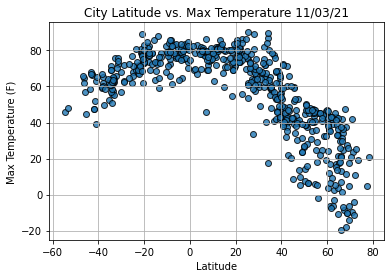

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

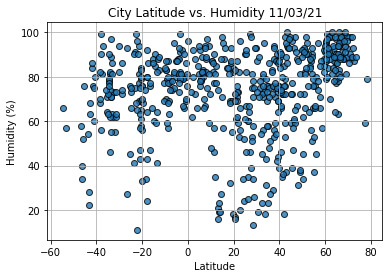

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

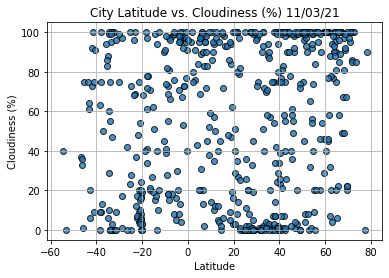

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

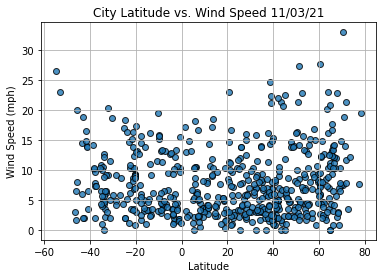

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

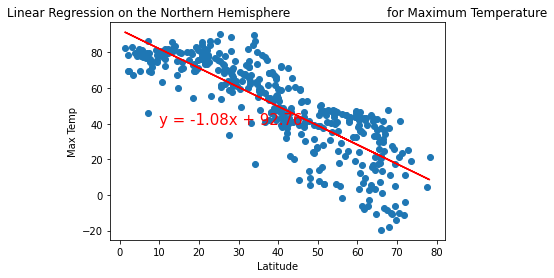

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

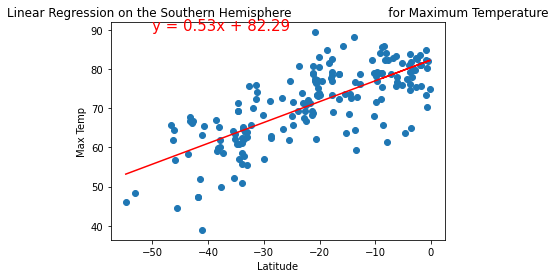

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

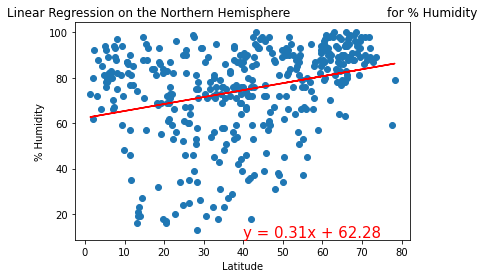

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

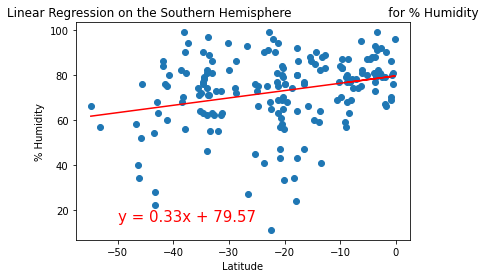

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

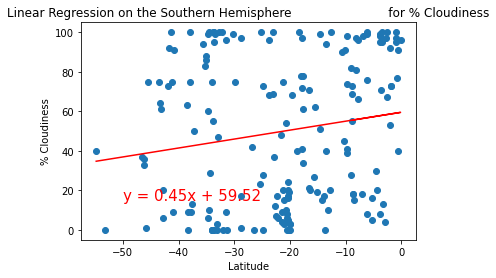

In [30]:
# Linear regression on the Southern Hemisphere(Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

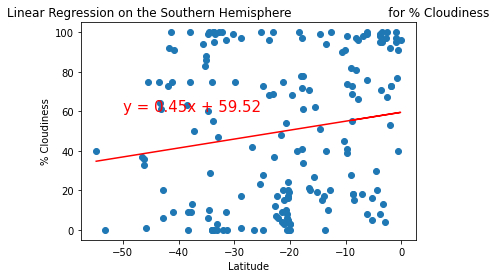

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

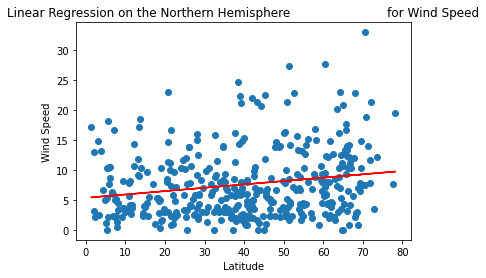

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

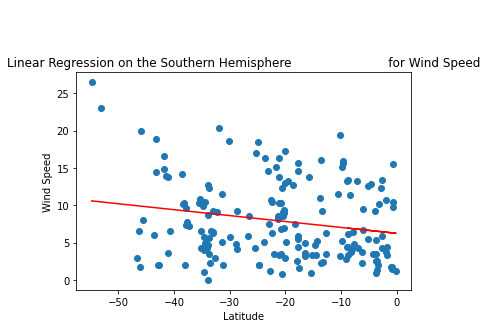

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))